<a href="https://colab.research.google.com/github/pSN0W/AI_Practice/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting Drive and Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np


In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir("/content/drive/MyDrive/Toy_datasets")
os.getcwd()

'/content/drive/MyDrive/Toy_datasets'

In [5]:
concentric = np.array(pd.read_csv("concerticcir1.csv"))

In [6]:
concentric.shape

(99, 3)

In [7]:
X=concentric[:,:2]
Y=concentric[:,2]

#Importing Module

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import tqdm.notebook as tq

#Naive Bayes

## Code

In [10]:
# Splitting data

X_1,X_test,Y_1,T_test = train_test_split(X,Y,test_size=0.3,random_state=0)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_1,Y_1,test_size = 0.3,random_state = 0)


In [33]:
# Making model

alpha = np.arange(1,400)
train_error = []
cv_error = []

for i in tq.tqdm(alpha):
  n_b =BernoulliNB(alpha=i)
  n_b.fit(X_train,Y_train)
  err_cv = log_loss(Y_cv,n_b.predict_proba(X_cv))
  err_train = log_loss(Y_train,n_b.predict_proba(X_train))
  train_error.append(err_train)
  cv_error.append(err_cv)

##Plotting

Text(0.5, 1.0, 'Bernoulli Naive Bayes Plot')

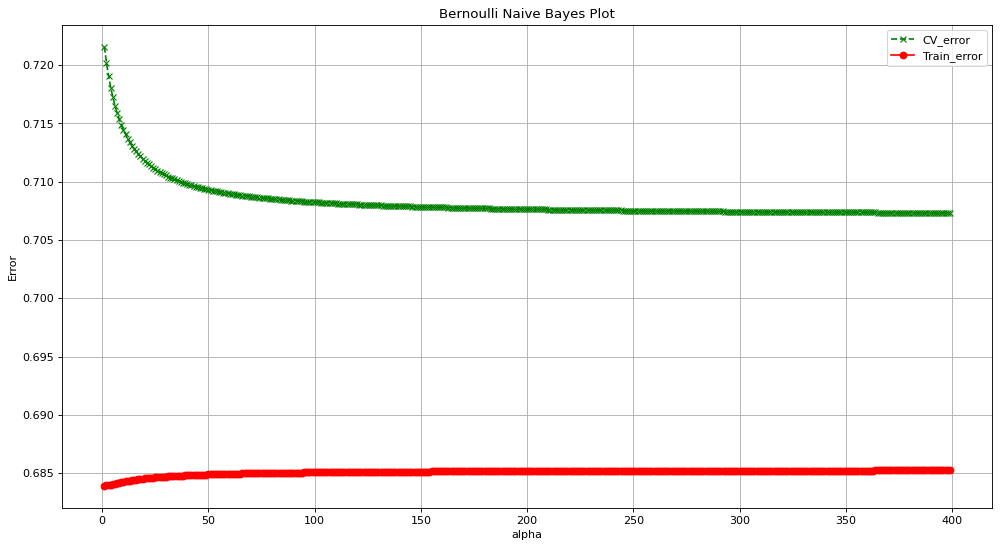

In [34]:
plt.figure(figsize=[15,8],dpi=80)
plt.plot(alpha,cv_error,"g--",marker="x",label="CV_error")
plt.plot(alpha,train_error,"r",marker="o",label="Train_error")
plt.grid()
plt.legend()
plt.xlabel("alpha")
plt.ylabel("Error")
plt.title("Bernoulli Naive Bayes Plot")

Text(0.5, 1.0, 'Bernoulli Naive Bayes Plot')

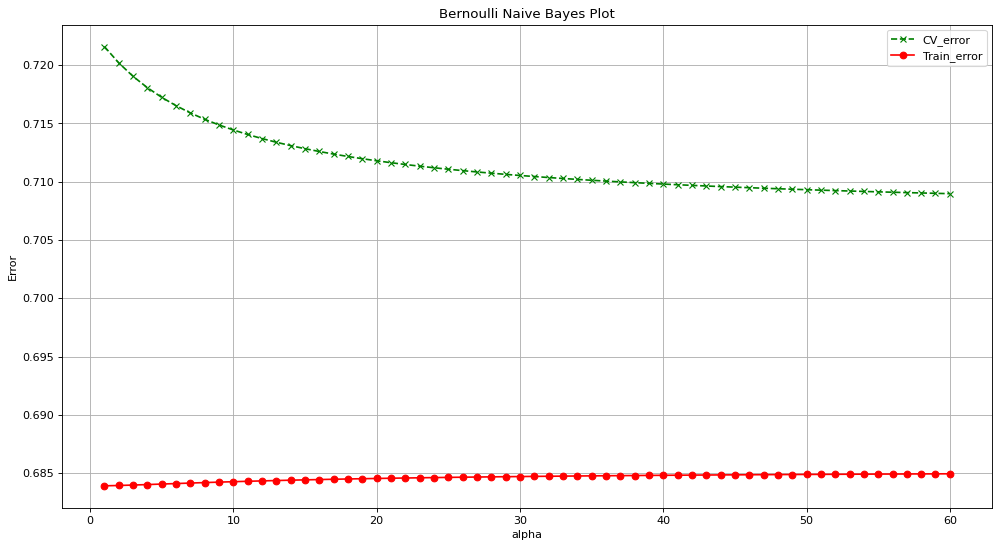

In [35]:
plt.figure(figsize=[15,8],dpi=80)
plt.plot(alpha[:60],cv_error[:60],"g--",marker="x",label="CV_error")
plt.plot(alpha[:60],train_error[:60],"r",marker="o",label="Train_error")
plt.grid()
plt.legend()
plt.xlabel("alpha")
plt.ylabel("Error")
plt.title("Bernoulli Naive Bayes Plot")

<b> Best for alpha = 60</b>

##Finding accuracy on test data

In [38]:
n_b = BernoulliNB(alpha = 60)
n_b.fit(X_train,Y_train)
acc = accuracy_score(T_test,n_b.predict(X_test))*100
log = log_loss(T_test,n_b.predict_proba(X_test))
print("Model has an accuracy of {} and log loss of {} for alpha = 60".format(acc,log)) 

Model has an accuracy of 43.333333333333336 and log loss of 0.7179002664098756 for alpha = 60


##Naive Bayes doesn't work well with real datas